Требуется написать Python скрипт, где на вход подается:

1. один из типов распределения (нормальное, равномерное, биномиальное, экспоненциальное) + параметры этого распределения (у нормального матожидание и дисперсия, у равномерного отрезок и тд)
2. целое число N

Вывод программы:

* визуализация плотности (или функции вероятности) распределения
* гистограмма из выборки N элементов этого распределения
* Три числа:
    * теоретическое матожидание
    * среднее арифметическое из N элементов
    * разница между этими числамм

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic

In [77]:
def get_vizualization(dist, N, bins=15, **params):
    grid = np.linspace(dist.ppf(0.001, **params), dist.ppf(0.999, **params), 100)


    plt.plot(grid, dist.pdf(grid, **params))
    plt.title('Плотность распределения')
    plt.show()
    
    plt.plot(grid, dist.cdf(grid, **params))
    plt.title('Функция распределения')
    plt.show()
    
    X = dist.rvs(**params, size=N)
    
    mean = dist.stats(**params, moments='m')
    
    plt.hist(X, density=True, bins=bins)
    plt.title('Гистограмма')
    plt.show()
    
    print('Теоретическое среднее:\t\t\t', "%.4f" % mean)
    print('Выборочное среднее:\t\t\t', "%.4f" % X.mean(), end='\n\n')
    
    print('Разница между теоретическим и выборочным средним:', "%.4f" % (np.float64(mean) - np.float64(X.mean())))   

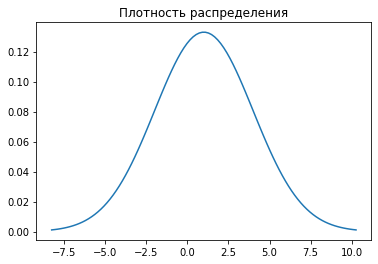

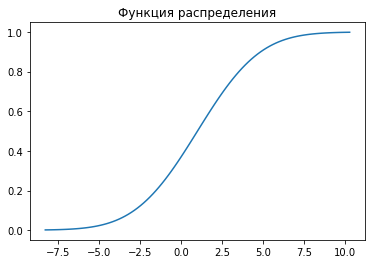

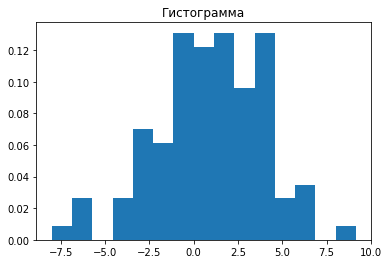

Теоретическое среднее:			 1.0000
Выборочное среднее:			 0.9617

Разница между теоретическим и выборочным средним: 0.0383


In [78]:
get_vizualization(st.norm, 100, loc=1, scale=3)

Требуется использовать ноутбук и файл с данными из практической части лекции (прикреплены к теоретической части )

Построить предсказательные интервалы для ежемесячного дохода и запрошенной суммы (в предположении логнормальности данных)

In [3]:
df = pd.read_csv('data.csv', sep=',')
df.shape

(10000, 7)

In [4]:
df.sample(5)

,id,required_amt,installment_flg,monthly_income_amt,age,has_high_education_flg,approved_flg
9624,9625,17070.0,1,35000,33,0,0
7519,7520,22734.0,1,45000,33,1,1
5728,5729,72897.0,1,34500,18,0,0
7160,7161,63001.0,1,100000,27,1,0
3712,3713,50871.0,0,80000,28,0,0


* id - идентификатор заявки на получение кредита на товар/услугу
* required_amt - запрошенная сумма кредита
* installment_flg - флаг промо продукта
* monthly_income_amt - ежемесячный доход заявителя
* age - возраст заявителя
* has_high_education_flg - наличие высшего образования
* approved_flg - одобрил ли банк заявку

$$\bar{X}_n \pm z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}$$

In [15]:
df_m = np.log(df.monthly_income_amt)
df_req = np.log(df.required_amt)

In [16]:
monthly_income_conf_int = _zconfint_generic(df_m.mean(),
                                            df_m.std() / np.sqrt(len(df)),
                                            0.05,
                                            'two-sided')
required_conf_int = _zconfint_generic(df_req.mean(),
                                      df_req.std() / np.sqrt(len(df)),
                                      0.05,
                                      'two-sided')

print(f'monthly_income_amt 95% confidence interval: [{monthly_income_conf_int[0]:,.2f} - {monthly_income_conf_int[1]:,.2f}]')
print(f'required_amt 95% confidence interval: [{required_conf_int[0]:,.2f} - {required_conf_int[1]:,.2f}]')

monthly_income_amt 95% confidence interval: [10.57 - 10.59]
required_amt 95% confidence interval: [10.26 - 10.28]
